In [15]:
# conda install -c conda-forge geopandas

In [16]:
# pip install geodatasets

In [19]:
import geopandas
from geodatasets import get_path
import matplotlib.pyplot as plt

path_to_data = get_path("geoda.health_indicators")
gdf = geopandas.read_file(path_to_data)

gdf

,area_num,shape_area,shape_len,comm_area,BirthRate,Gener_Rate,LowBi_ight,Prena_ster,Prete_rths,TeenB_Rate,...,Gonor_ales,Gono_les_1,Tuber_osis,Below_evel,Crowd_sing,Dependency,NoHig_loma,PerCa_come,Unemp_ment,geometry
0,35,4.600462e+07,31027.054510,DOUGLAS,10.3,42,11,76,10.2,34.2,...,1063.3,727.4,4.2,26.1,1.6,31.0,16.9,23098,16.7,"POLYGON ((-87.609 41.845, -87.609 41.845, -87...."
1,36,1.691396e+07,19565.506153,OAKLAND,17.5,63,13,75,11.5,54.5,...,1655.4,1629.3,6.7,38.1,3.5,40.5,17.6,19312,26.6,"POLYGON ((-87.592 41.817, -87.592 41.817, -87...."
2,37,1.991670e+07,25339.089750,FULLER PARK,11.9,60,17,71,14.3,69.2,...,1061.9,1556.4,0.0,55.5,4.5,38.2,33.7,9016,40.0,"POLYGON ((-87.629 41.802, -87.629 41.802, -87...."
3,38,4.849250e+07,28196.837157,GRAND BOULEVARD,14.3,58,12,74,13.7,54.8,...,1454.6,1680.0,13.2,28.3,2.7,41.7,19.4,22056,20.6,"POLYGON ((-87.607 41.817, -87.607 41.817, -87...."
4,39,2.907174e+07,23325.167906,KENWOOD,12.2,51,11,77,11.9,25.7,...,610.2,549.1,0.0,23.1,2.3,34.2,10.8,37519,11.0,"POLYGON ((-87.592 41.817, -87.592 41.817, -87...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,74,7.558429e+07,48665.130539,MOUNT GREENWOOD,12.5,59,8,94,15.1,7.7,...,0.0,0.0,0.0,3.1,1.1,37.0,4.5,34221,6.9,"POLYGON ((-87.696 41.707, -87.696 41.706, -87...."
73,75,9.187734e+07,46396.419362,MORGAN PARK,13.2,67,10,74,12.3,46.7,...,800.5,741.1,2.6,13.7,0.8,39.4,10.9,26185,14.9,"POLYGON ((-87.642 41.685, -87.642 41.685, -87...."
74,76,3.718356e+08,173625.984660,OHARE,15.8,70,3,82,5.0,15.9,...,0.0,0.0,6.3,9.5,1.9,26.5,11.0,29402,4.7,"MULTIPOLYGON (((-87.837 41.986, -87.837 41.986..."
75,77,4.844999e+07,31004.830946,EDGEWATER,12.1,48,7,76,7.4,15.1,...,120.1,427.5,10.5,16.6,3.9,23.4,9.0,33364,9.0,"POLYGON ((-87.655 41.998, -87.655 41.998, -87...."


<Axes: >

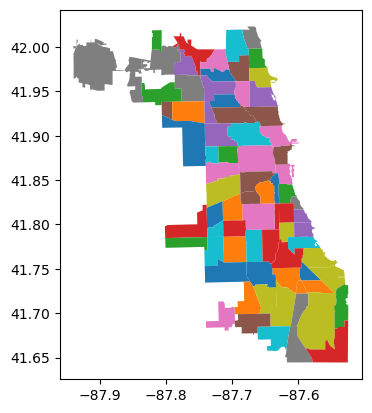

In [18]:
gdf.plot("comm_area")

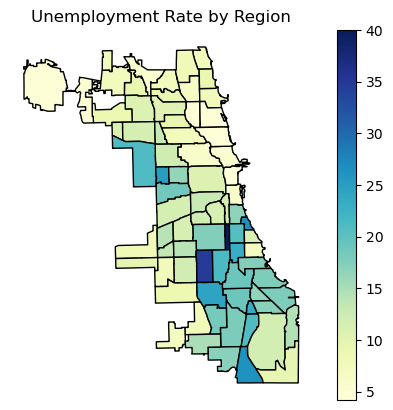

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt
from geodatasets import get_path

# Load dataset
path_to_data = get_path("geoda.health_indicators")
gdf = gpd.read_file(path_to_data)

# Plot immunization rate heatmap
gdf.plot(column="Unemp_ment", cmap="YlGnBu", legend=True, edgecolor='black')

# Set plot title and hide axes
plt.title("Unemployment Rate by Region")
plt.axis("off")
plt.show()


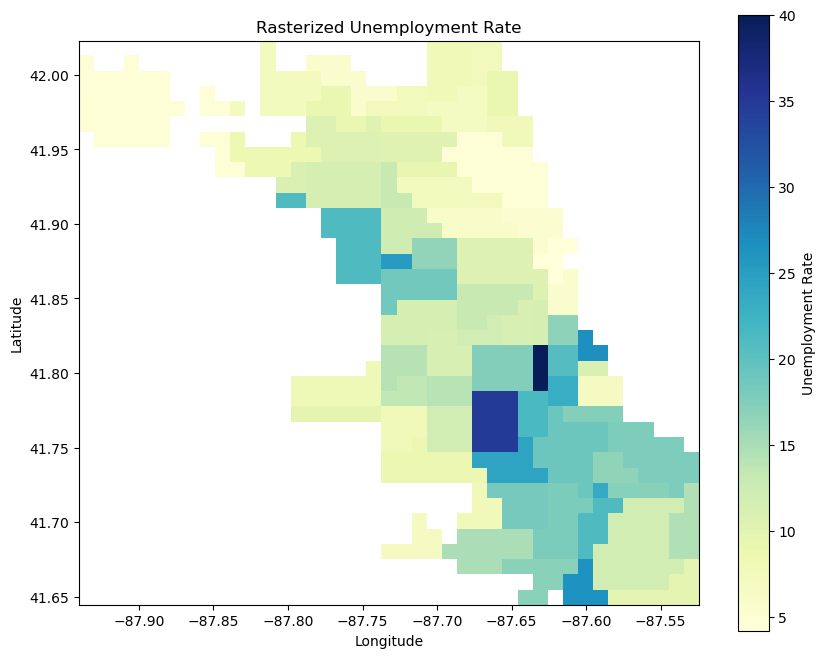

In [26]:
import geopandas as gpd
from geodatasets import get_path
import rasterio
from rasterio.features import rasterize
import numpy as np
import matplotlib.pyplot as plt

# Load vector data
path_to_data = get_path("geoda.health_indicators")
gdf = gpd.read_file(path_to_data)

# Set resolution and bounds for raster
resolution = 0.01  # degrees
minx, miny, maxx, maxy = gdf.total_bounds
width = int((maxx - minx) / resolution)
height = int((maxy - miny) / resolution)

# Transform for rasterization
from affine import Affine
transform = Affine.translation(minx, maxy) * Affine.scale(resolution, -resolution)

# Create (geometry, value) pairs
shapes = ((geom, value) for geom, value in zip(gdf.geometry, gdf["Unemp_ment"]))

# Rasterize
raster = rasterize(
    shapes,
    out_shape=(height, width),
    transform=transform,
    fill=np.nan,
    dtype='float32'
)

# Plot the raster
plt.figure(figsize=(10, 8))
plt.imshow(raster, cmap='YlGnBu', extent=(minx, maxx, miny, maxy))
plt.colorbar(label='Unemployment Rate')
plt.title('Rasterized Unemployment Rate')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [25]:
# pip install rasterio

In [36]:
import geopandas as gpd
from geodatasets import get_path

# Load data
path_to_data = get_path("geoda.health_indicators")
gdf = gpd.read_file(path_to_data)

# Define indicators and whether higher is better
health_indicators = {
    "BirthRate": False,
    "LowBi_ight": False,
    "Prena_ster": True,
    "Prete_rths": False,
    "TeenB_Rate": False,
    "Gonor_ales": False,
    "Tuber_osis": False,
    "Below_evel": False,
    "Crowd_sing": False,
    "Dependency": False,
    "NoHig_loma": False,
    "Unemp_ment": False,
    "PerCa_come": True,
}

# Normalize and combine
import pandas as pd

norm_data = pd.DataFrame(index=gdf.index)

for col, high_is_good in health_indicators.items():
    col_min = gdf[col].min()
    col_max = gdf[col].max()
    normalized = (gdf[col] - col_min) / (col_max - col_min)
    norm_data[col] = normalized if high_is_good else 1 - normalized

# Calculate the health score as the average of normalized indicators
gdf["HealthScore"] = norm_data.mean(axis=1)

print(gdf[["comm_area", "HealthScore"]])

          comm_area  HealthScore
0           DOUGLAS     0.638079
1           OAKLAND     0.467902
2       FULLER PARK     0.398530
3   GRAND BOULEVARD     0.485138
4           KENWOOD     0.678194
..              ...          ...
72  MOUNT GREENWOOD     0.779765
73      MORGAN PARK     0.627711
74            OHARE     0.792196
75        EDGEWATER     0.734664
76      EDISON PARK     0.781532

[77 rows x 2 columns]


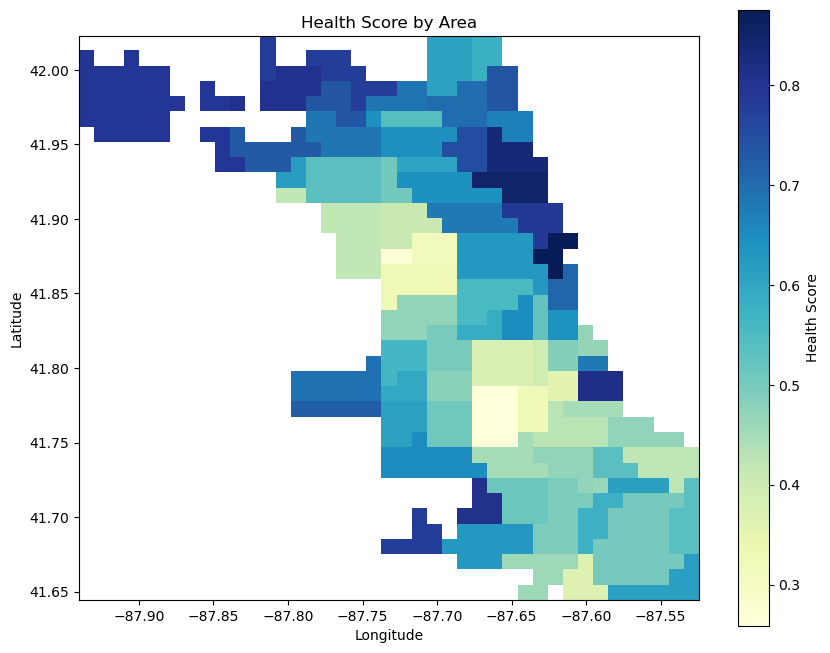

In [37]:
# Set resolution and bounds for raster
resolution = 0.01  # degrees
minx, miny, maxx, maxy = gdf.total_bounds
width = int((maxx - minx) / resolution)
height = int((maxy - miny) / resolution)

# Transform for rasterization
from affine import Affine
transform = Affine.translation(minx, maxy) * Affine.scale(resolution, -resolution)

# Create (geometry, value) pairs
shapes = ((geom, value) for geom, value in zip(gdf.geometry, gdf["HealthScore"]))

# Rasterize
raster = rasterize(
    shapes,
    out_shape=(height, width),
    transform=transform,
    fill=np.nan,
    dtype='float32'
)

# Plot the raster
plt.figure(figsize=(10, 8))
plt.imshow(raster, cmap='YlGnBu', extent=(minx, maxx, miny, maxy))
plt.colorbar(label='Health Score')
plt.title('Health Score by Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

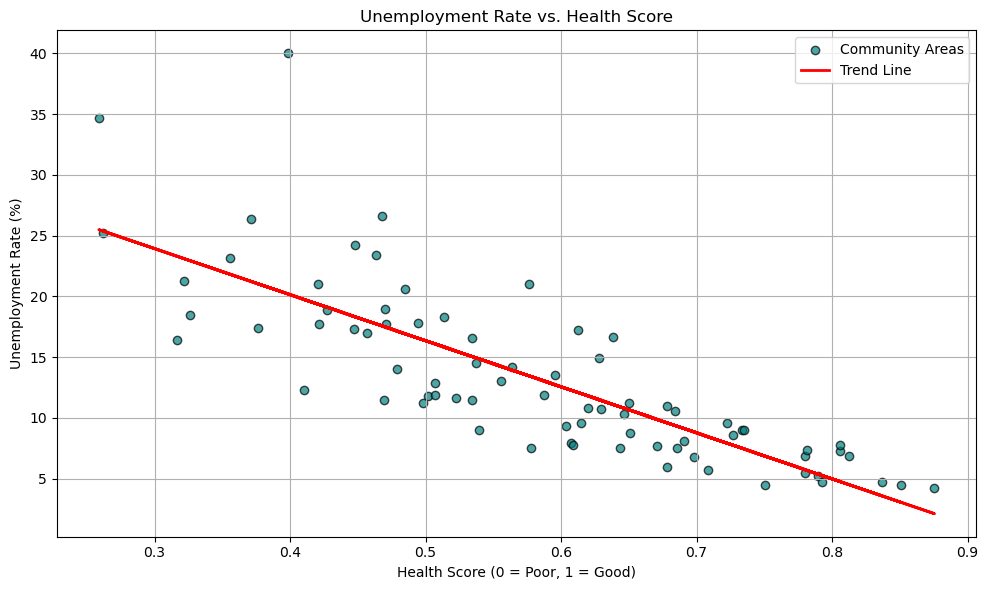

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data
x = gdf["HealthScore"]
y = gdf["Unemp_ment"]

# Fit linear regression
slope, intercept = np.polyfit(x, y, 1)
trendline = slope * x + intercept

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, color='teal', edgecolor='k', label='Community Areas')
plt.plot(x, trendline, color='red', linewidth=2, label='Trend Line')

# Labels
plt.xlabel("Health Score (0 = Poor, 1 = Good)")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate vs. Health Score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
